In [29]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from pydantic import BaseModel, Field
from typing import TypedDict
from dotenv import load_dotenv

In [30]:
load_dotenv()

True

In [31]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-pro")

In [ ]:
class ClassesSchema(BaseModel):
    classes: list[str] = Field(..., description="Category of the query from the following - book_study_room, find_study_group, get_class_schedule, get_assignment_deadline, get_exam_schedule, order_food, order_coffee, find_nearby_food, check_dining_hours, get_events, register_event, recommend_activity, get_club_meetings, check_library_hours, find_gym_slot, find_campus_service, check_laundry_status, reserve_parking, get_directions, check_bus_schedule, book_cab, find_bike_rack, add_calendar_event, set_reminder, summarize_emails, make_todo_list, get_weather")
    api_calls: list[str] = Field(..., description="APIs to be called to get information")

In [33]:
structured_model = model.with_structured_output(ClassesSchema)

In [34]:
class StudentLifeState(TypedDict):
    query: str
    classes: list[str]
    api_calls: list[str]
    response: str

In [35]:
def identify_task(state: StudentLifeState) -> StudentLifeState:
    classes_identified = structured_model.invoke(
        f"Identify the category of the following student life related query and the APIs to be called to get information. Query: {state['query']}"
    )
    return {
        "classes": classes_identified.classes,
        "api_calls": classes_identified.api_calls
    }

In [36]:
graph = StateGraph(StudentLifeState)

In [37]:
graph.add_node("identify_task", identify_task)

In [38]:
graph.add_edge(START, "identify_task")
graph.add_edge("identify_task", END)

In [39]:
workflow = graph.compile()

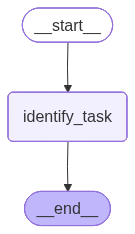

In [40]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [48]:
workflow.invoke({"query": "I am failing midterms."})

{'query': 'I am failing midterms.',
 'classes': ['find_study_group',
  'get_class_schedule',
  'get_assignment_deadline'],
 'api_calls': ['find_study_group',
  'get_class_schedule',
  'get_assignment_deadline']}